In [2]:
import sys
sys.path.append("../")
DATA_PATH = "../data/"
SAVE_PATH = "../plots"

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *
from py_common.bounds_dependence import *
from py_common.wave_function import *
from matplotlib.collections import LineCollection
import itertools

# plt.rcParams.update({'font.size': 18})

# Potential surface

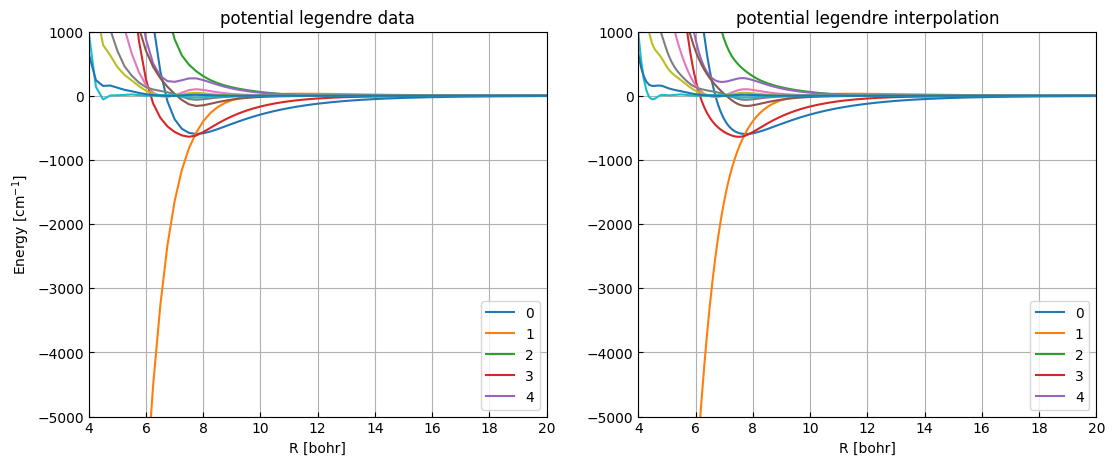

In [2]:
files = [
    "potential_dec_data.dat",
    "potential_dec_interpolated.dat",
]

titles = [
    "potential legendre data",
    "potential legendre interpolation",
]

fig, axes = utility.plot_many(1, 2, (13, 5), sharex = True)

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/{files[i]}")
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(titles[i])
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(4, 20)
    ax.set_ylim(-5000, 1000)

axes[0].set_ylabel(r"Energy [cm$^{-1}$]");
    

(0.0, 3.141592653589793)

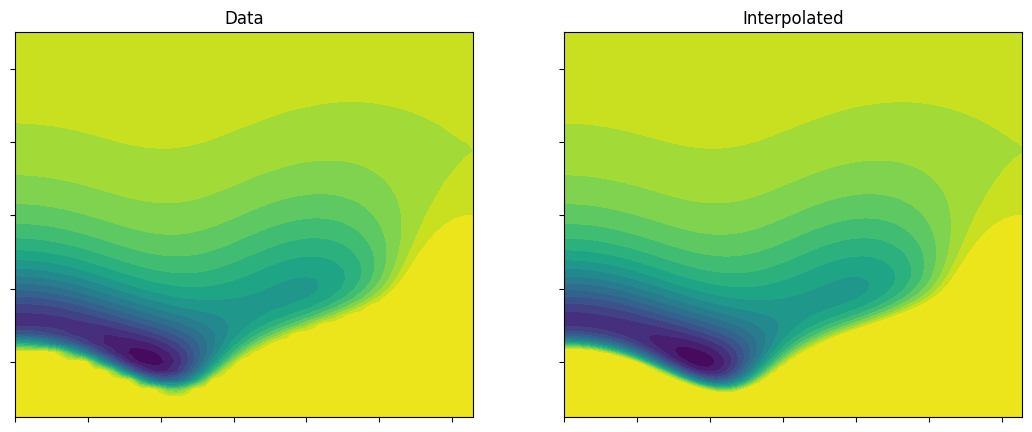

In [ ]:
potential = utility.load(f"{DATA_PATH}/potential_dec_data.dat")
r = potential[:, 0]
potential = potential[:, 1:] / CMINV

fig, axes = plt.subplots(1, 2, figsize = (13, 5))

_, ax = utility.plot_surface(r, potential, fig_ax = (fig, axes[0]), add_0 = False, levels = 20)
ax.set_title("Data")
ax.set_ylim(4.5, 15)
ax.set_xlim(0, np.pi)

potential = utility.load(f"{DATA_PATH}/potential_dec_interpolated.dat")
r = potential[:, 0]
potential = potential[:, 1:] / CMINV

_, ax = utility.plot_surface(r, potential, fig_ax = (fig, axes[1]), add_0 = False, levels = 20)
ax.set_title("Interpolated")
ax.set_ylim(4.5, 15)
ax.set_xlim(0, np.pi);

# Anisotropic hyperfine

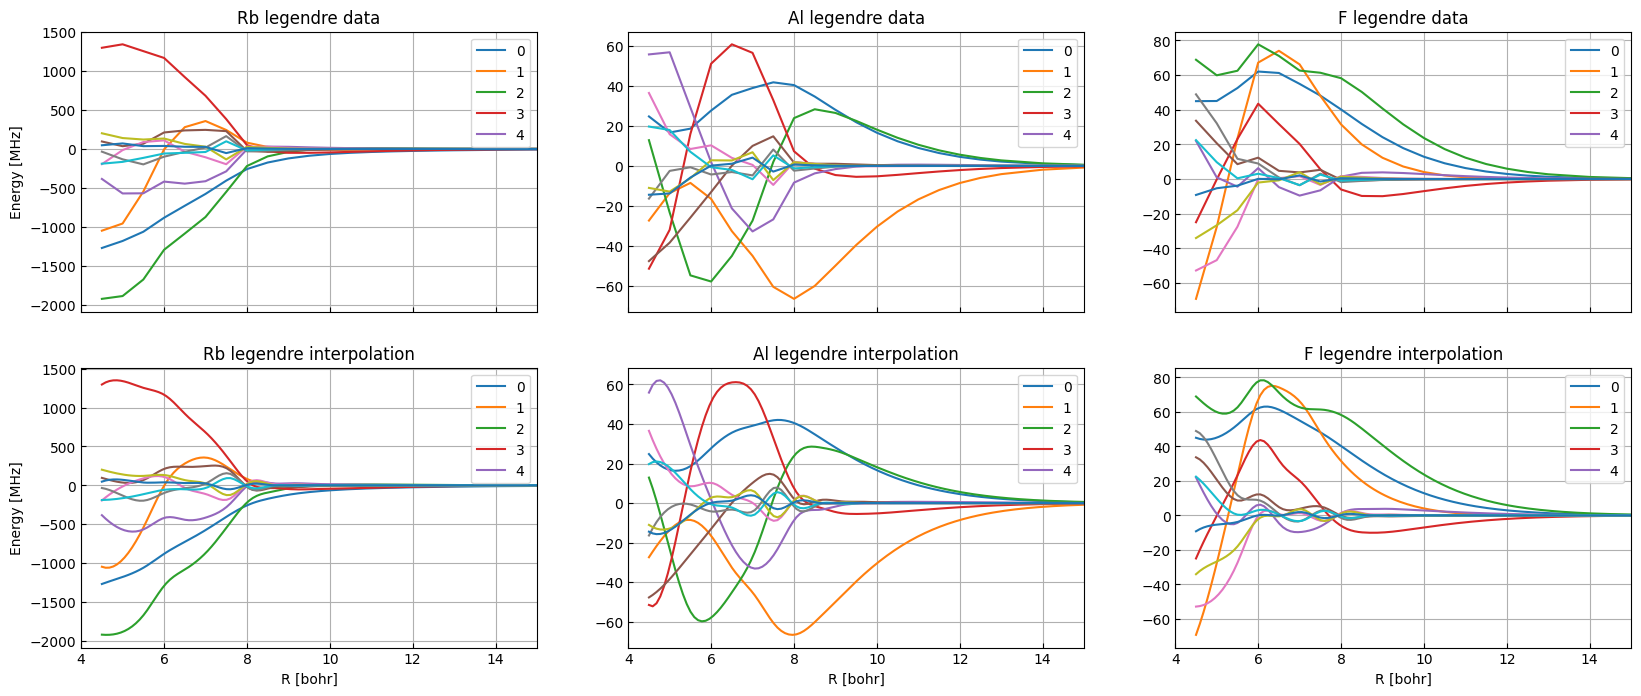

In [52]:
files = [
    "aniso_hifi_Rb_data.dat",
    "aniso_hifi_Al_data.dat",
    "aniso_hifi_F_data.dat",
    "aniso_hifi_Rb_interpolated.dat",
    "aniso_hifi_Al_interpolated.dat",
    "aniso_hifi_F_interpolated.dat",
]

titles = [
    "Rb legendre data",
    "Al legendre data",
    "F legendre data",
    "Rb legendre interpolation",
    "Al legendre interpolation",
    "F legendre interpolation",
]

fig, axes = utility.plot_many(2, 3, (20, 8), sharex = True)

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/{files[i]}")
    scalings = data[:, 0]
    values_legendre = data[:, 1:] / MHZ

    ax.plot(scalings, values_legendre)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(titles[i])

    ax.set_xlim(4, 15)
    # ax.set_ylim(-5000, 1000)

axes[0, 0].set_ylabel("Energy [MHz]")
axes[1, 0].set_ylabel("Energy [MHz]")

axes[1, 0].set_xlabel("R [bohr]")
axes[1, 1].set_xlabel("R [bohr]")
axes[1, 2].set_xlabel("R [bohr]");

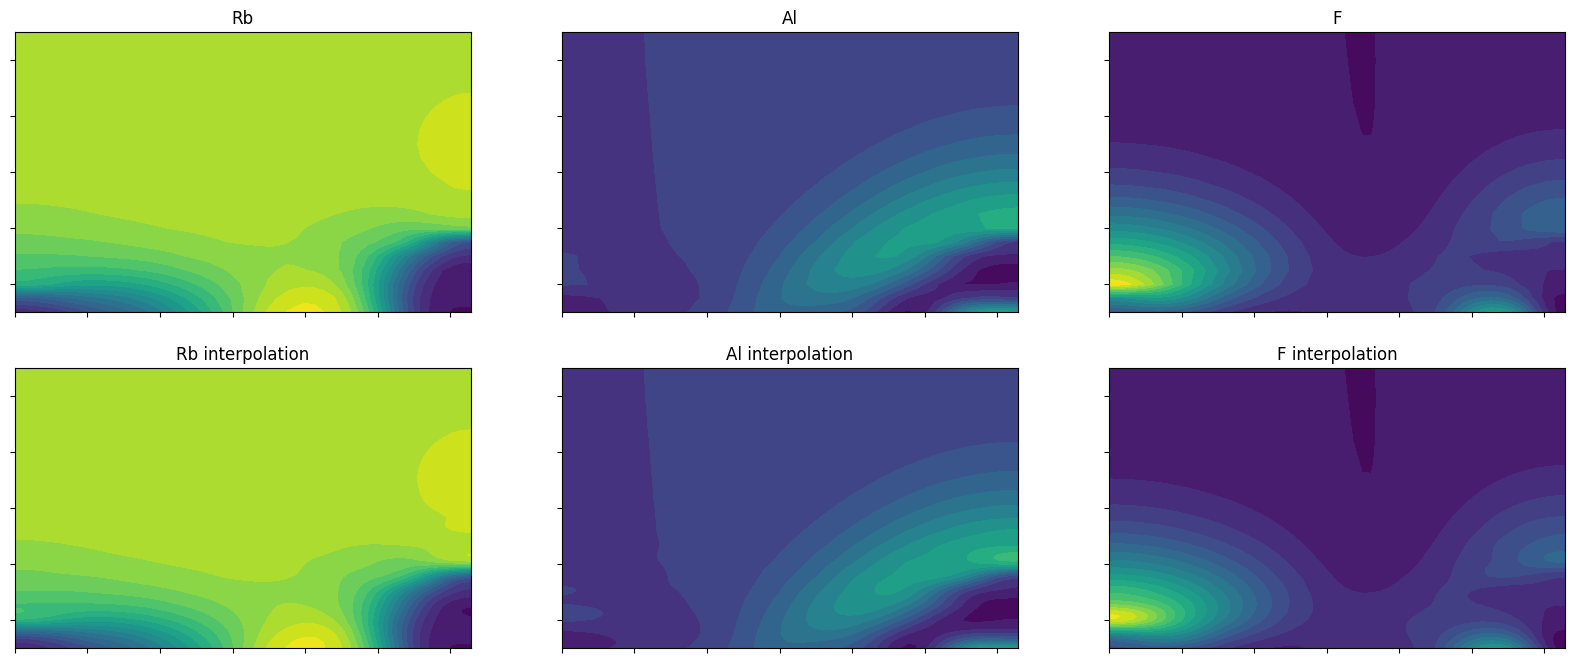

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20, 8))
axes = utility.AxesArray(axes, 2, 3)

files = [
    "aniso_hifi_Rb_data.dat",
    "aniso_hifi_Al_data.dat",
    "aniso_hifi_F_data.dat",
    "aniso_hifi_Rb_interpolated.dat",
    "aniso_hifi_Al_interpolated.dat",
    "aniso_hifi_F_interpolated.dat",
]

titles = [
    "Rb",
    "Al",
    "F",
    "Rb interpolation",
    "Al interpolation",
    "F interpolation",
]

for i, ax in enumerate(axes):
    potential = utility.load(f"{DATA_PATH}/{files[i]}")
    r = potential[:, 0]
    potential = potential[:, 1:] * 1000 / KELVIN

    utility.plot_surface(r, potential, fig_ax = (fig, ax), add_0 = False, levels = 20)
    ax.set_title(titles[i])

    ax.set_ylim(5, 15)
    ax.set_xlim(0, np.pi)


# Scattering calculations

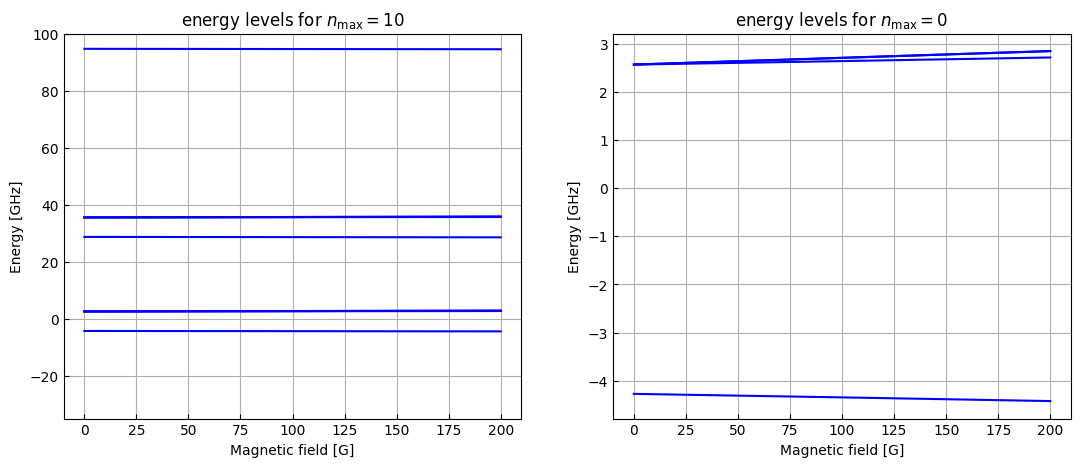

In [25]:
fig, axes = utility.plot_many(1, 2, (13, 5), sharex = True)

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_10.dat")

axes[0].plot(data[:, 0], data[:, 1:], color = "blue")
axes[0].set_ylabel("Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-35, 100)
axes[0].set_title(r"energy levels for $n_\text{max} = 10$")

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0.dat")
axes[1].plot(data[:, 0], data[:, 1:], color = "blue")
axes[1].set_ylabel("Energy [GHz]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_title(r"energy levels for $n_\text{max} = 0$");

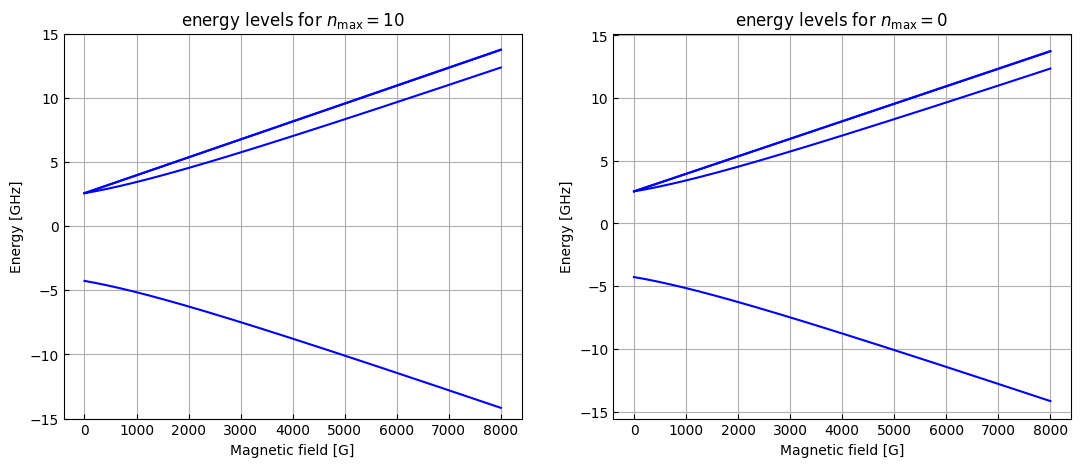

In [26]:
fig, axes = utility.plot_many(1, 2, (13, 5), sharex = True)

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_10_far.dat")
axes[0].plot(data[:, 0], data[:, 1:], color = "blue")
axes[0].set_ylabel("Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-15, 15)
axes[0].set_title(r"energy levels for $n_\text{max} = 10$")

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
axes[1].plot(data[:, 0], data[:, 1:], color = "blue")
axes[1].set_ylabel("Energy [GHz]")

axes[1].set_xlabel("Magnetic field [G]");
axes[1].set_title(r"energy levels for $n_\text{max} = 0$");

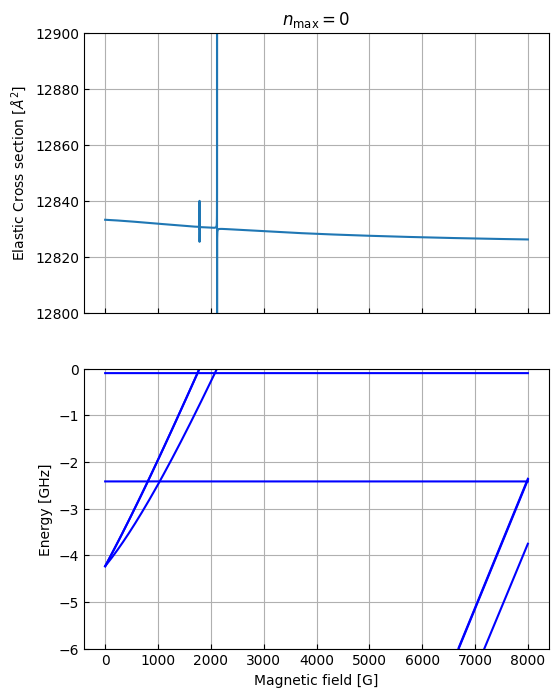

In [18]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0.json")
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_0.json")

fig, axes = utility.plot_many(2, 1, (6, 8), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].set_title(r"$n_\text{max} = 0$")
axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12800, 12900)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]");

for state in bounds_single.states():
	axes[1].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[1].set_ylabel(f"Energy [GHz]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-6, 0);

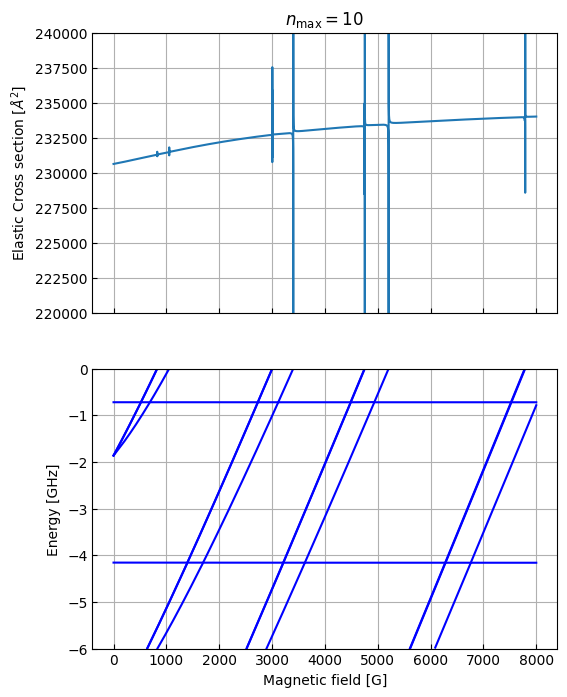

In [19]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10.json")
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_10.json")

fig, axes = utility.plot_many(2, 1, (6, 8), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()


axes[0].plot(points, cross_section / ANGS**2)
axes[0].set_ylim(220000, 240000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_title(r"$n_\text{max} = 10$")

for state in bounds_single.states():
	axes[1].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[1].set_ylabel(f"Energy [GHz]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-6, 0);

Text(0.5, 0, 'Magnetic field [G]')

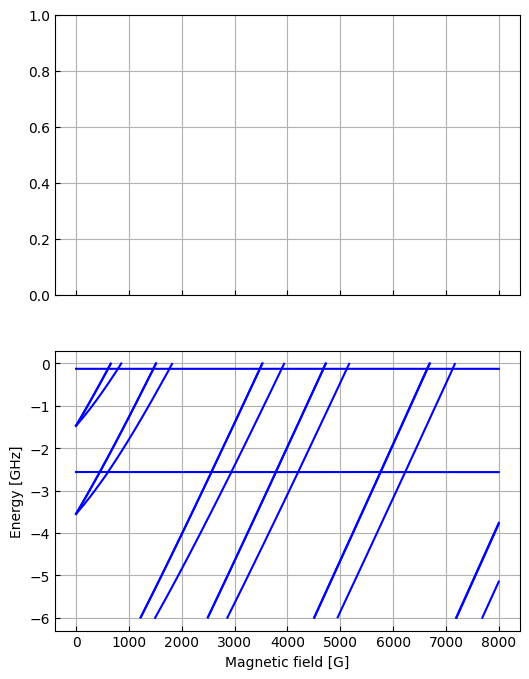

In [10]:
# data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_65.json")
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65.json")

fig, axes = utility.plot_many(2, 1, (6, 8), sharex=True)

# points = data.parameters
# cross_section = data.elastic_cross_sections()

# axes[0].plot(points, cross_section / ANGS**2)
# axes[0].set_ylim(220000, 240000)
# axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
# axes[0].set_title(r"$n_\text{max} = 10$")

for state in bounds_single.states():
	axes[1].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[1].set_ylabel(f"Energy [GHz]")
axes[1].set_xlabel("Magnetic field [G]")
# axes[1].set_ylim(-0.132, -0.127);
# axes[1].set_xlim(1800, 2000)

# Simple "ABM"

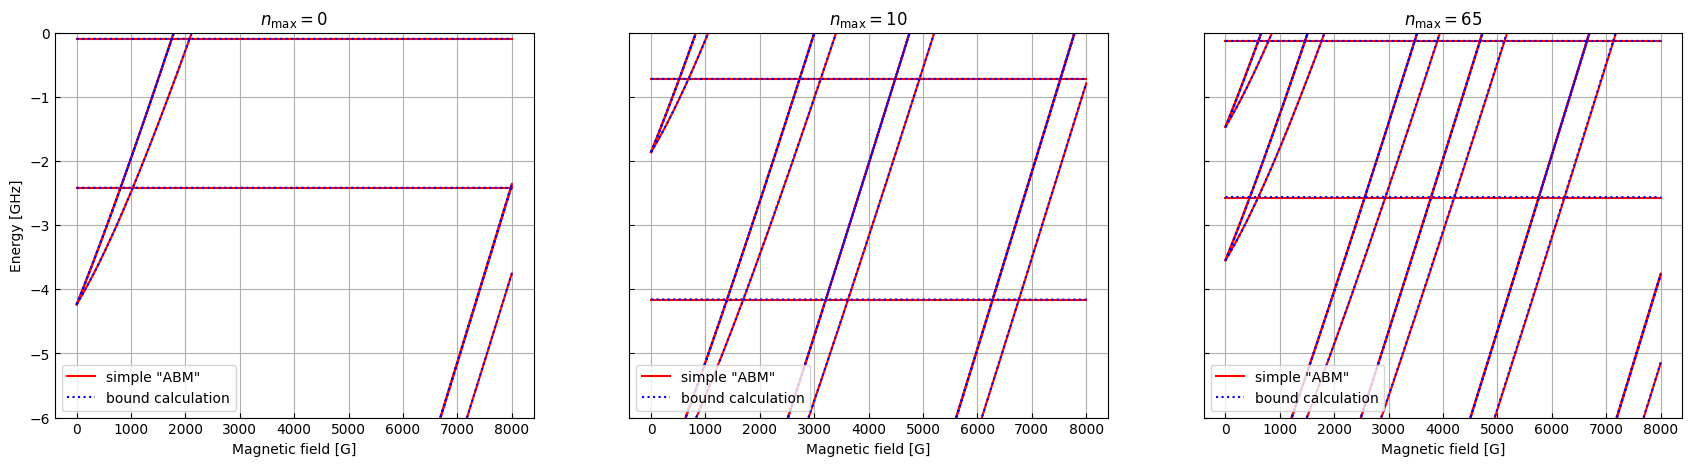

In [ ]:
n_maxes = [0, 10, 65]
fig, axes = utility.plot_many(1, 3, shape = (21, 5), sharey = True)

for n_take, ax in zip(n_maxes, axes):
    bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_{n_take}_structureless.json")
    bounds = bounds_single.data[:, -1]
    levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
    levels[:, 1:] -= levels[:, 1:2]

    for b in bounds:
        ax.plot(levels[:, 0], levels[:, 1:] + b, color = "red")

    bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_{n_take}.json")
    for state in bounds_single.states():
        ax.plot(state[:, 0], state[:, 1], color = "blue", linestyle = ":")
        
    ax.set_title(rf"$n_\text{{max}} = {n_take}$")
    ax.set_xlabel("Magnetic field [G]")
    ax.set_ylim(-6, 0)
    ax.legend(
        [ax.lines[0], ax.lines[-1]], 
        ['simple "ABM"', "bound calculation"],
        loc = "lower left"
    )
axes[0].set_ylabel(f"Energy [GHz]");

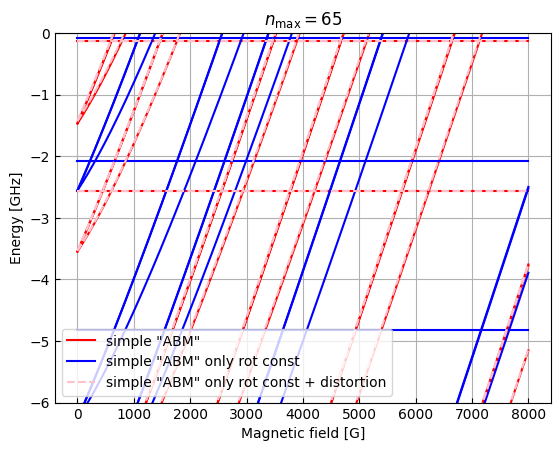

In [ ]:
fig, ax = utility.plot()

bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65_structureless.json")
bounds = bounds_single.data[:, -1]
levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
levels[:, 1:] -= levels[:, 1:2]

for b in bounds:
    ax.plot(levels[:, 0], levels[:, 1:] + b, color = "red")

bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65_structureless_full.json")
bounds = bounds_single.data[:, -1]
levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
levels[:, 1:] -= levels[:, 1:2]

for b in bounds:
    ax.plot(levels[:, 0], levels[:, 1:] + b, color = "blue")

bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65_structureless_distortion.json")
bounds = bounds_single.data[:, -1]
levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
levels[:, 1:] -= levels[:, 1:2]

for b in bounds:
    ax.plot(levels[:, 0], levels[:, 1:] + b, color = "pink", linestyle = "--")

ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-6, 0)
ax.legend(
    [ax.lines[0], ax.lines[len(ax.lines) // 2], ax.lines[-1]], 
    ['simple "ABM"', 'simple "ABM" only rot const',  'simple "ABM" only rot const + distortion'], 
    loc = "lower left"
)
ax.set_ylabel(f"Energy [GHz]")

# fig.savefig(f"{SAVE_PATH}/simple_abm_n_max_65.pdf", bbox_inches="tight")
ax.set_title(r"$n_\text{max} = 65$");

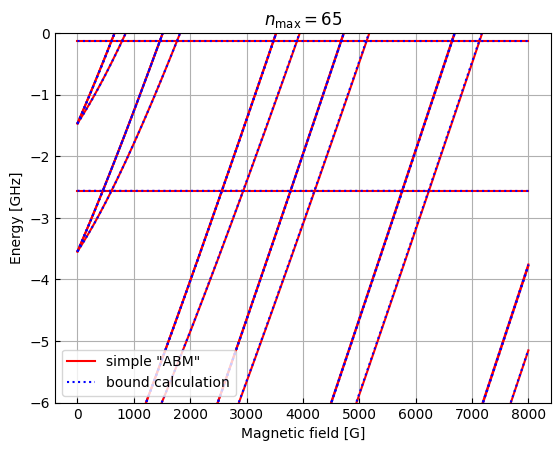

In [ ]:
fig, ax = utility.plot()

bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65_structureless.json")
bounds = bounds_single.data[:, -1]
levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
levels[:, 1:] -= levels[:, 1:2]

for b in bounds:
    ax.plot(levels[:, 0], levels[:, 1:] + b, color = "red")

bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65.json")
for state in bounds_single.states():
    ax.plot(state[:, 0], state[:, 1], color = "blue", linestyle = ":")

ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-6, 0)
ax.legend(
    [ax.lines[0], ax.lines[-1]], 
    ['simple "ABM"', "bound calculation"], 
    loc = "lower left"
)
ax.set_ylabel(f"Energy [GHz]")

# fig.savefig(f"{SAVE_PATH}/bound_calculation_n_max_65.pdf", bbox_inches="tight")
ax.set_title(r"$n_\text{max} = 65$");

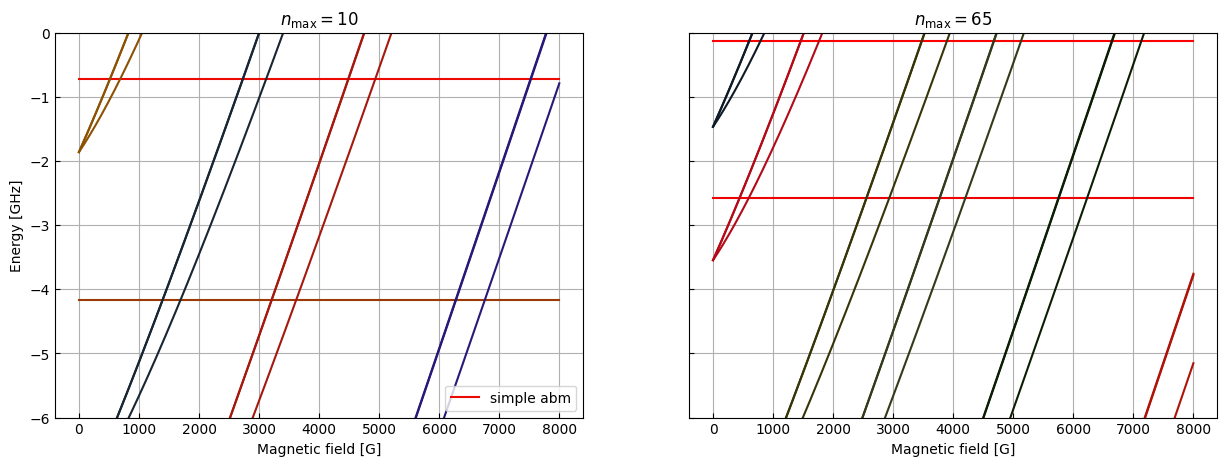

In [17]:
fig, axes = utility.plot_many(1, 2, (15, 5), sharey = True)

waves = wavefunction_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_10_wavefunction.json", 3)
bounds = [
    (
        w.energy, 
        (
            np.trapezoid(w.values[:, 0]**2, w.distances), 
            np.trapezoid(w.values[:, 1]**2, w.distances),
            np.trapezoid(w.values[:, 2]**2, w.distances),
        )
    ) for w in waves.values()
]

levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
levels[:, 1:] -= levels[:, 1:2]

ax = axes[0]
for (b, color) in bounds:
    ax.plot(levels[:, 0], levels[:, 1:] + b, color = color)

ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-6, 0)
ax.legend(["simple abm"])
ax.set_ylabel(f"Energy [GHz]")
ax.set_title(r"$n_\text{max} = 10$")

######

waves = wavefunction_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65_wavefunction.json", 3)
bounds = [
    (
        w.energy, 
        (
            np.trapezoid(w.values[:, 0]**2, w.distances), 
            np.trapezoid(w.values[:, 1]**2, w.distances),
            np.trapezoid(w.values[:, 2]**2, w.distances),
        )
    ) for w in waves.values()
]
levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
levels[:, 1:] -= levels[:, 1:2]

ax = axes[1]
for (b, color) in bounds:
    ax.plot(levels[:, 0], levels[:, 1:] + b, color = color)

ax.set_xlabel("Magnetic field [G]")
ax.set_title(r"$n_\text{max} = 65$");

fig.savefig(f"{SAVE_PATH}/simple_abm_wave_colored.pdf", bbox_inches="tight")

# Wave functions

In [12]:
colors = ["red", "green", "blue", "purple", "cyan", "pink"]
linestyles = ["dotted", "dashdot", "solid", "dashed"]

## B-field

In [3]:
def b_dependent_wave(filename: str, n_take = 5, hifi_n = 4, lims = (0, 40)):
    n_take = 5
    hifi_n = 4
    size = (n_take + 1) * hifi_n
    wave_functions = wavefunction_json(f"{DATA_PATH}/{filename}", size)

    fig, axes = utility.plot_many(1, len(wave_functions), (7 * len(wave_functions), 4))
    for (_, wave), ax in zip(wave_functions.items(), axes):
        j = 0
        for color in colors:
            for linestyle in linestyles:
                ax.plot(wave.distances, wave.values[:, j], color = color, linestyle = linestyle)
                j += 1
        ax.set_xlabel("r [bohr]")
        ax.set_ylabel(r"$|\psi(r)|^2$")
        ax.set_title(f"E = {(1000 * wave.energy):.2f} MHz")
        ax.set_xlim(*lims)

    hifi_legend = axes[0].legend([f"{j}" for j in range(hifi_n)], title='Hifi level', loc = "upper right");
    axes[0].add_artist(hifi_legend)
    axes[0].legend([axes[1].lines[j] for j in range(2, size, 4)], [f"{j}" for j in range(n_take + 1)], title='n level', loc = "lower left")

    return fig, axes

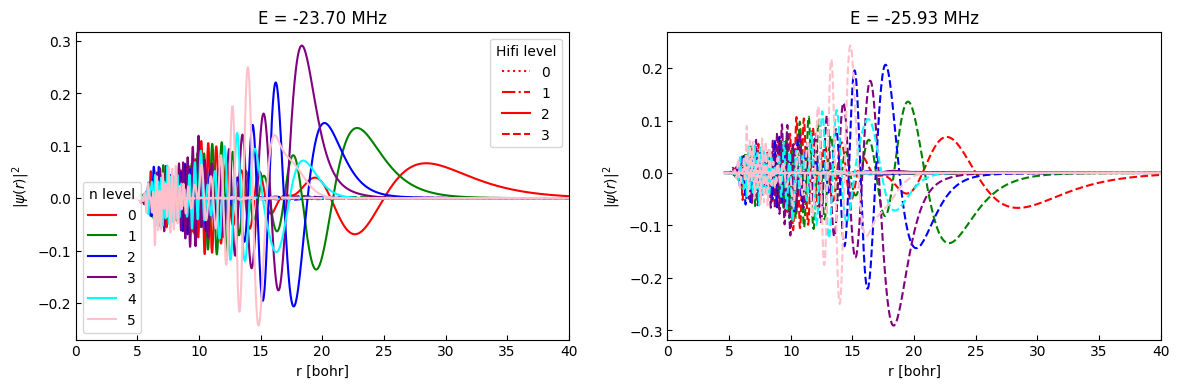

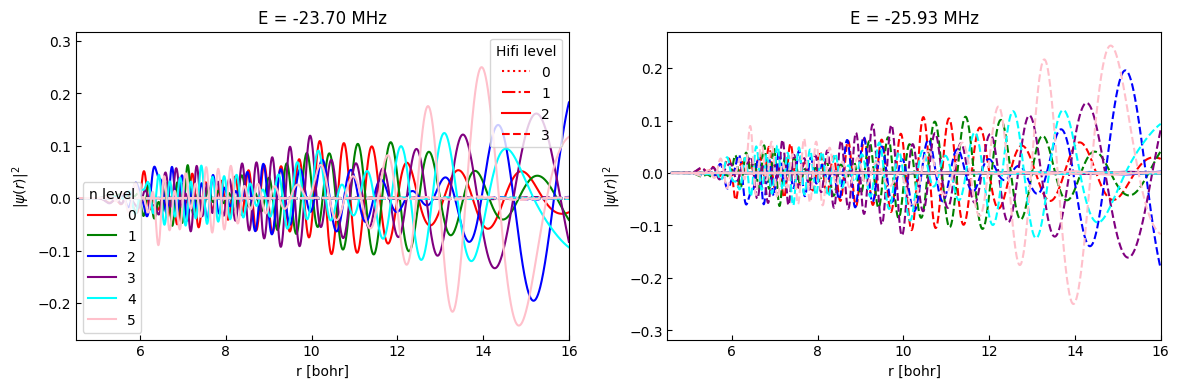

In [14]:
fig, axes = b_dependent_wave("alf_rb_wavefunction_n_max_65_650_field.json");
for ax in axes:
    ax.grid(False)

fig, axes = b_dependent_wave("alf_rb_wavefunction_n_max_65_650_field.json", lims = (4.5, 16));
for ax in axes:
    ax.grid(False)

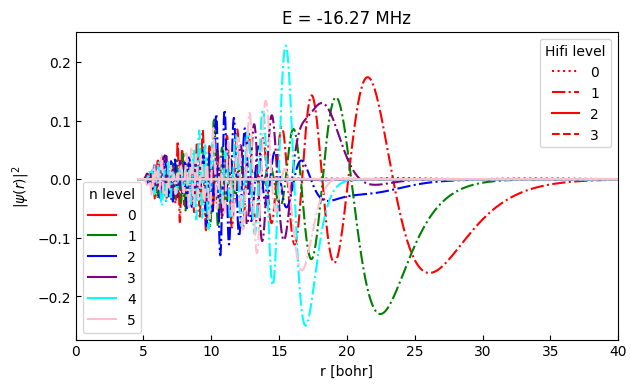

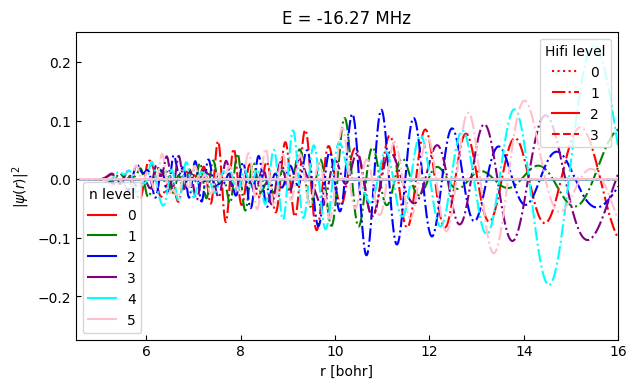

In [15]:
fig, axes = b_dependent_wave("alf_rb_wavefunction_n_max_65_3935_field.json");
for ax in axes:
    ax.grid(False)

fig, axes = b_dependent_wave("alf_rb_wavefunction_n_max_65_3935_field.json", lims = (4.5, 16));
for ax in axes:
    ax.grid(False)

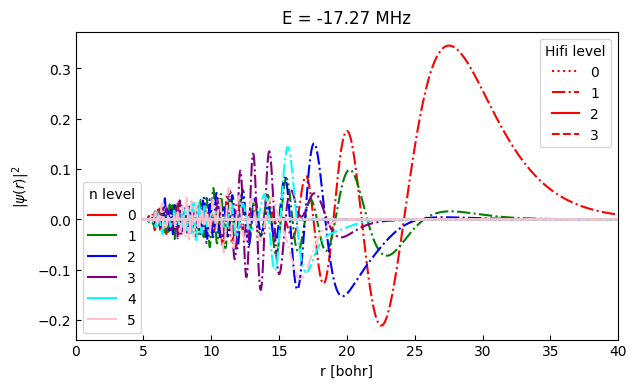

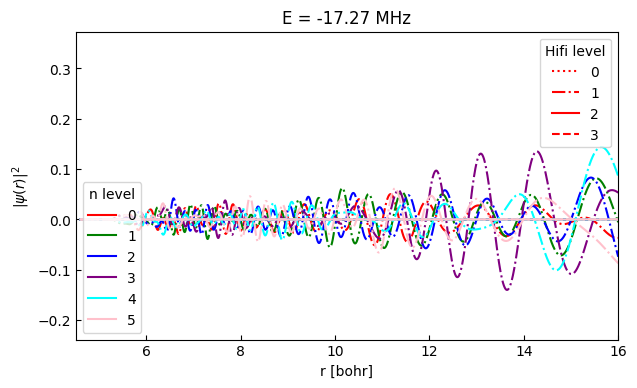

In [16]:
fig, axes = b_dependent_wave("alf_rb_wavefunction_n_max_65_1815_field.json");
for ax in axes:
    ax.grid(False)

fig, axes = b_dependent_wave("alf_rb_wavefunction_n_max_65_1815_field.json", lims = (4.5, 16));
for ax in axes:
    ax.grid(False)

## Structureless

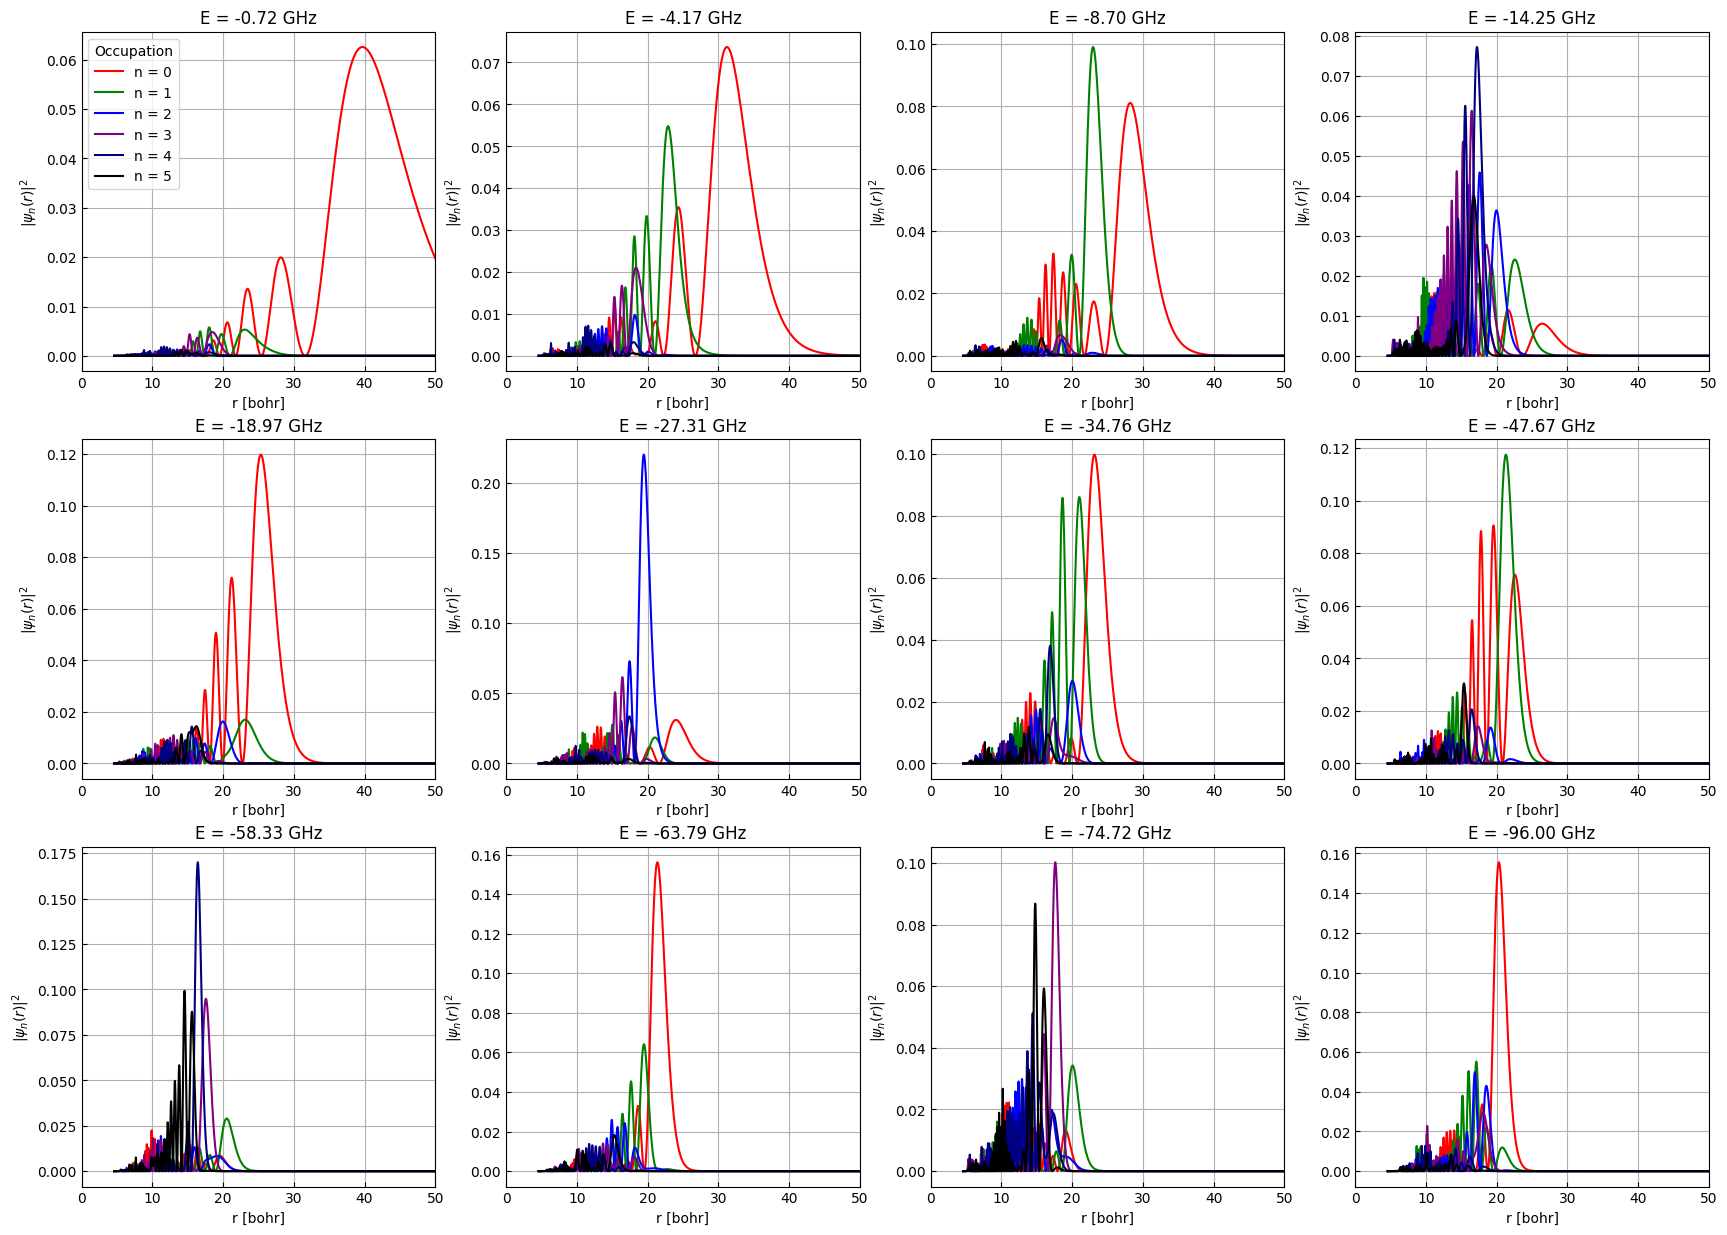

In [ ]:
n_take = 5
wave_functions = wavefunction_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_10_wavefunction.json", n_take + 1)

fig, axes = utility.plot_many(3, 4, (21, 15))
for i, ((n, wave), ax) in enumerate(zip(wave_functions.items(), axes)):
    for j in range(wave.values.shape[1]):
        ax.plot(wave.distances, wave.values[:, j] ** 2, color = colors[j])

    ax.set_xlabel("r [bohr]")
    ax.set_ylabel(r"$|\psi_n(r)|^2$")
    ax.set_title(f"E = {wave.energy:.2f} GHz")
    ax.set_xlim(0, 50)

axes[0, 0].legend([f"n = {j}" for j in range(n_take + 1)], title='Occupation');

# fig.savefig(f"{SAVE_PATH}/wavefunctions_n_max_10.pdf", bbox_inches = "tight")

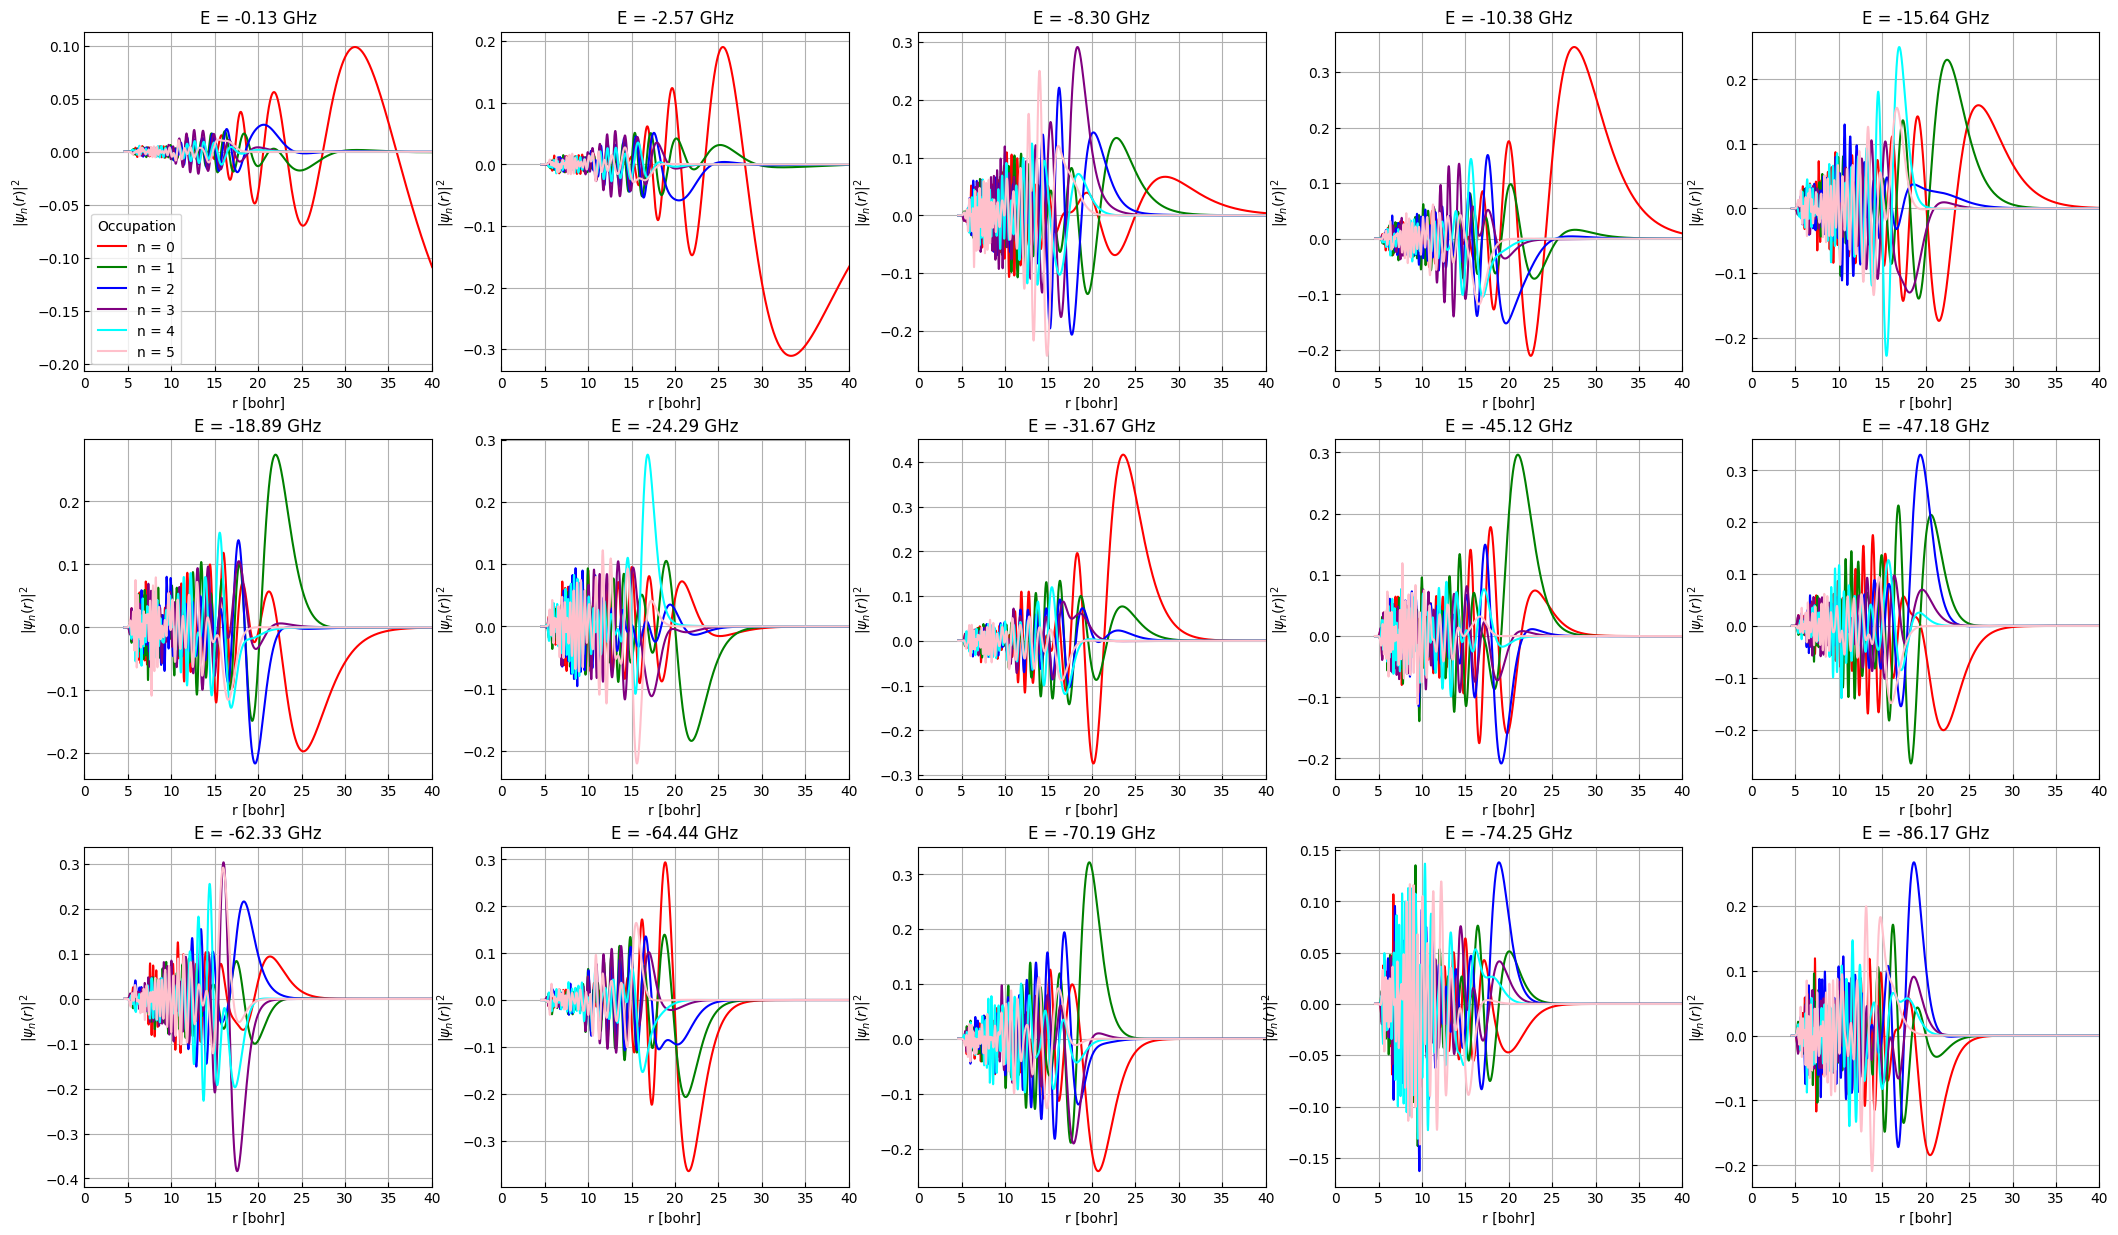

In [14]:
n_take = 5
wave_functions = wavefunction_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_65_wavefunction.json", n_take + 1)

fig, axes = utility.plot_many(3, 5, (26, 15))
for i, ((n, wave), ax) in enumerate(zip(wave_functions.items(), axes)):
    for j in range(wave.values.shape[1]):
        ax.plot(wave.distances, wave.values[:, j], color = colors[j])

    ax.set_xlabel("r [bohr]")
    ax.set_ylabel(r"$|\psi_n(r)|^2$")
    ax.set_title(f"E = {wave.energy:.2f} GHz")
    ax.set_xlim(0, 40)

axes[0, 0].legend([f"n = {j}" for j in range(n_take + 1)], title='Occupation');

# fig.savefig(f"{SAVE_PATH}/wavefunctions_n_max_65.pdf", bbox_inches = "tight")

# Convergences

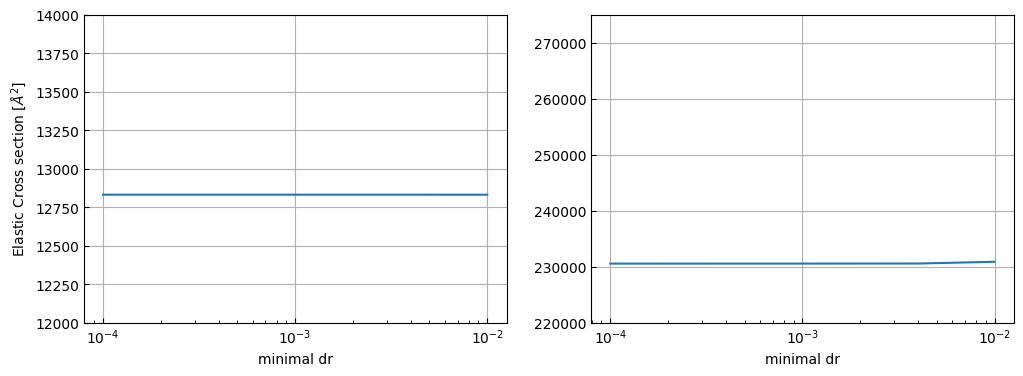

In [25]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0_convergence_dr.json")

fig, axes = utility.plot_many(1, 2, (12, 4), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12000, 14000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_xlabel("minimal dr")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10_convergence_dr.json")

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[1].plot(points, cross_section / ANGS**2)

axes[1].set_ylim(220000, 275000)
axes[1].set_xlabel("minimal dr")

axes[0].set_xscale("log")
axes[1].set_xscale("log");


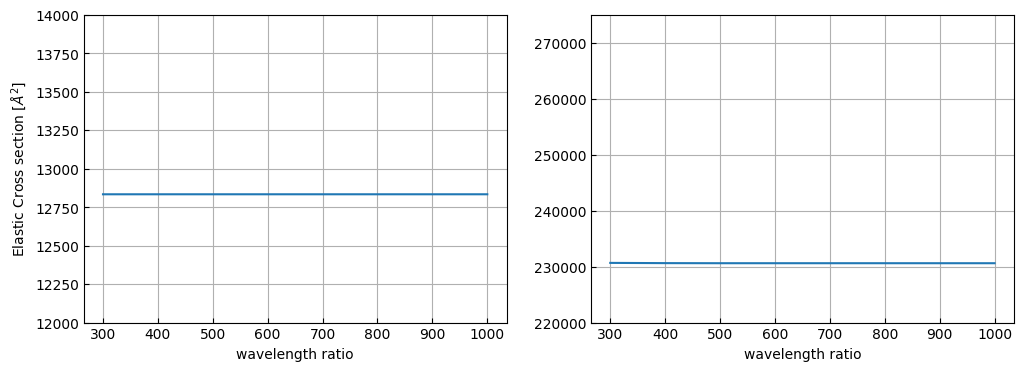

In [23]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0_convergence_step.json")

fig, axes = utility.plot_many(1, 2, (12, 4), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12000, 14000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_xlabel("wavelength ratio")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10_convergence_step.json")

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[1].plot(points, cross_section / ANGS**2)

axes[1].set_ylim(220000, 275000)
axes[1].set_xlabel("wavelength ratio");


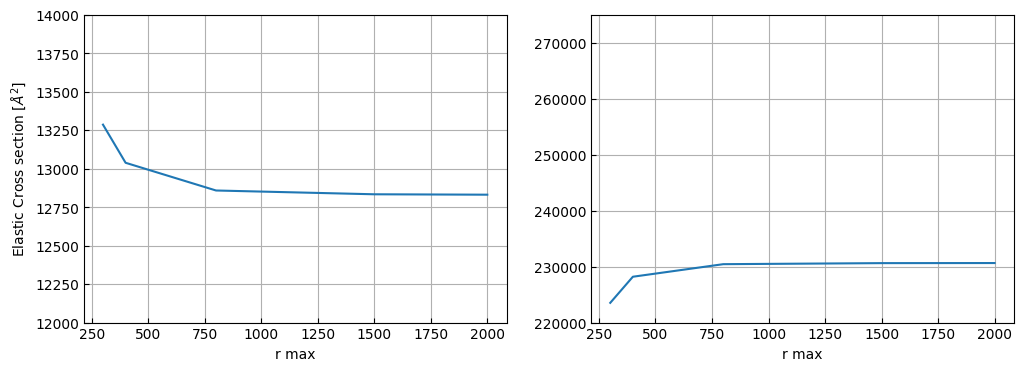

In [17]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0_convergence_distance.json")

fig, axes = utility.plot_many(1, 2, (12, 4), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12000, 14000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_xlabel("r max")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10_convergence_distance.json")

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[1].plot(points, cross_section / ANGS**2)

axes[1].set_ylim(220000, 275000)
axes[1].set_xlabel("r max");
